Calculate synthetics from the **Marmousi 2** model © 2019- Kajetan Chrapkiewicz.

#### Notebook config

In [1]:
import sys
sys.path.append("/work/n03/n03/shared/mpaulat-software/FullwavePy")
# %load /work/n03/n03/shared/mpaulat-software/FullwavePy/fullwavepy/config/jupyter.py
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2


Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [2]:
exe = dict(
    segyprep='/work/n03/n03/shared/Fullwave/bin/segyprep',
    fullwave='/work/n03/n03/shared/Fullwave/bin/fullwave3D.exe'
)

# Intro

In this example, we will generate synthetic pressure data from the vp model of Marmousi2 (Martin et al. al, 2006). This model is the laterally extended version of the original Marmousi model, with the additional water layer on top and the vs model (not used in this example). The density model will be derived implicitly inside `FULLWAVE3D` using the Gardner's relationship between vp and density.  

# Get the model

The model can be obtained from:

https://s3.amazonaws.com/open.source.geoscience/open_data/elastic-marmousi/elastic-marmousi-model.tar.gz


The archive is relatively heavy (~150 MB). Here, the vp model has already been downloaded, unpacked, cut (to preserve only its central region) and resampled to grid interval of 12.5 m. It can be accessed at:

In [3]:
model_path = 'downloaded/marmousi2_vp.sgy'
!ls {model_path}

downloaded/marmousi2_vp.sgy


In [4]:
from fullwavepy.seismic.models import ModelVp
m = ModelVp(model_path,overwrite_mmp=True)

INFO:fullwavepy.ioapi.generic.read_any: Set overwrite_mmp=False for faster i/o!
INFO:fullwavepy.ioapi.generic.read_any: Saving downloaded/marmousi2_vp.mmp...


# Prepare input

In [5]:
p = ProjSyn('marm2d', exe=exe, dt=0.001, ns=6000, dx=12.5, dims=(1361,1,281),
            info='Calculate synthetics from 2d Marmousi2 model.',cluster='archer')

Content of  .//marm2d/marm2d-Info.txt : 

Calculate synthetics from 2d Marmousi2 model.
 
INFO:fullwavepy.project.generic.au.ProjDef.__init__: 
-----------------------------------------
Project definition
-----------------------------------------
problem             :           synthetic
domain              :                time
dim                 :                  3d
equation            :            acoustic
anisotropy          :                none
kernel              :                 low
io                  :                 sgy
units               :              metric
qp                  :                   0
qs                  :                   0
INFO:fullwavepy.project.generic.au.ProjSgyMapp.__init__: Setting SEG-Y mapping (sgyhw) to Fullwave3D's default.
INFO:fullwavepy.project.generic.au.ProjCluster.__init__: Setting cluster to:  archer.


INFO:fullwavepy.project.generic.au.ProjGeometry.__init__: 
-----------------------------------------
Project geometry
-----------------------------------------
x1                  :                   0
x2                  :             17000.0
y1                  :                   0
y2                  :                 0.0
z1                  :                   0
z2                  :              3500.0
dx                  :                12.5
nx1                 :                1361
nx2                 :                   1
nx3                 :                 281
nn                  :              382441
ttime               :                 6.0
dt                  :               0.001
ns                  :                6000


INFO:fullwavepy.project.lists.extra.WavefieldFileList._read_tsteps: proj.env.var['SLAVES_WAVEFIELDSVTR']=-1000 => wavefield dumped at timesteps: [1000, 2000, 3000, 4000, 5000, 6000]


In [6]:
p.i.tvp.create(m,overwrite=True)
#dir(p.i.tvp)

In [7]:
p.i.tvp.surange()


3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.000631766 s, 5.1 MB/s
getpar() call after checkpars(): nextended

1361 traces:
tracl    1 1361 (1 - 1361)
tracr    1 1361 (1 - 1361)
fldr     1 1361 (1 - 1361)
tracf    1
ep       1
cdp      1 1361 (1 - 1361)
cdpt     1
trid     1
nvs      1
nhs      1
duse     1
scalel   1
scalco   1
sx       0 1360 (0 - 1360)
gx       0 1360 (0 - 1360)
counit   1
ns       281
dt       48160
gain     3

Shot coordinate limits:
	North(0,0) South(0,0) East(1360,0) West(0,0)

Receiver coordinate limits:
	North(0,0) South(0,0) East(1360,0) West(0,0)

Midpoint coordinate limits:
	North(0,0) South(0,0) East(1360,0) West(0,0)



INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: Saving .//marm2d//inp/marm2d-TrueVp.mmp...


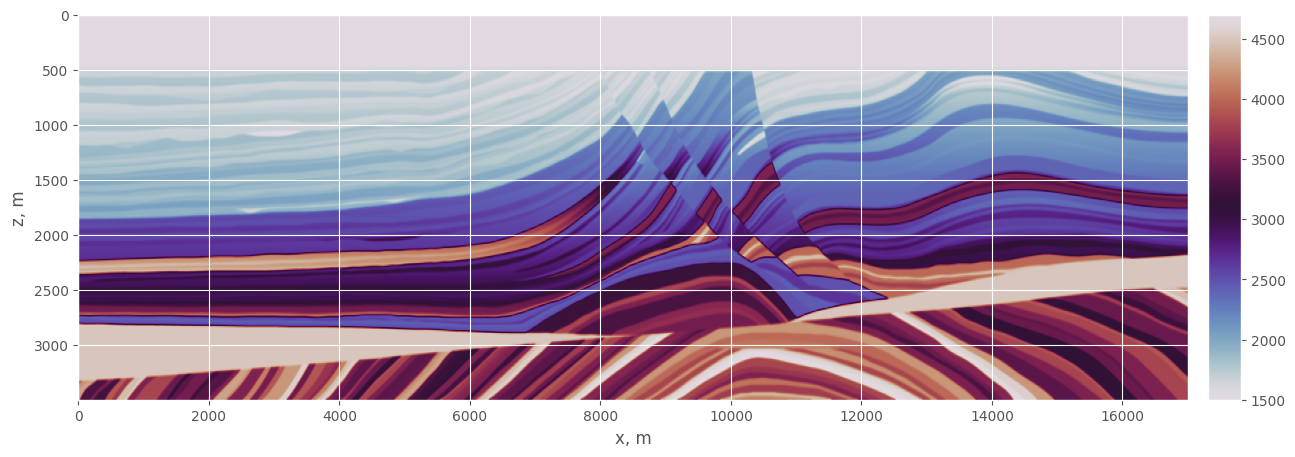

In [8]:
# plot 
figure(15,5)
p.i.tvp.plot(coord=0, title=None)
plt.xlabel('x, m')
plt.ylabel('z, m')
plt.show()

In [9]:
from fullwavepy.numeric.funcs import ricker
fpeak = 3 # Hz
p.i.rsg.create(ricker(fpeak, p.ns, p.dt))

INFO:fullwavepy.dsp.phase.first_breaks: Picking first breaks as first sample above 0.001 of the max amplitude of the trace.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: Saving .//marm2d//inp/marm2d-RawSign.mmp...


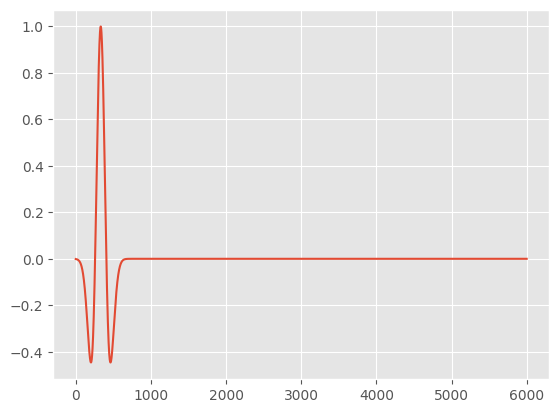

In [10]:
p.i.rsg.plot()

In [11]:
p.i.sp.create()

In [13]:
p.i.sp.create(ztype='d', geometry='regular', geometry_in_nodes=True,
              souz=11, soux0=11, soudx=10, sounx=200,
              recz=11, recx0=21, recdx=5, recnx=500)
p.i.sp.cat()

Content of  .//marm2d//inp/marm2d-SegyPrep.key : 
FFID : yes
addtodepth : 0
debug : yes
dtms : 1.0
dx : 12.5
fixedarray : yes
geometry : regular
io : sgy
maxoffset : 1000000.0
minoffset : 0
nx1 : 1361
nx2 : 1
nx3 : 281
outseis : yes
outsource : yes
problem : synthetic
recdx : 62.5
recdy : 1
reciprocity : 0
recnx : 500.0
recny : 0
recx0 : 250.0
recy0 : 0
recz : 137.5
retain : yes
soudx : 125.0
soudy : 0
sounx : 200.0
souny : 1
soux0 : 125.0
souy0 : 0
souz : 137.5
text : yes
ttime : 6000.0
unique : yes
ztype : d
 


In [14]:
p.i.sp.run()

INFO:fullwavepy.project.files.text.runfiles.SegyPrepFile.run: Running SegyPrep...

 SEGYPREP  -  Version 3.21.02                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to marm2d
 Preparing files for synthetics...

 Grid points in-line:                   1361
 Grid points cross-line:                   1
 Grid points vertically:                 281
 Horiz grid spacing (metres):      12.5000000    
 Vert grid spacing (metres):       12.5000000    
 Model length (metres):            17000.0000    
 Model width (metres):             0.00000000    
 Model depth (metres):             3500.00000    

 Modelling time step (ms):         1.00000000    
 Output data delta-T (ms):         1.00000000    
 Output data length (ms):          6000.00000    
 Output data length (samples):          6000
 Time steps to model:                   6000

 No band-pass filter applied
 Nyquist in output seg-y (Hz):     500.000000    



In [15]:
p.i.rnf.create()

INFO:fullwavepy.project.files.text.runfiles.Runfile.create: Using some values from .//marm2d//inp/marm2d-Skeleton.key. To modify that file, update SegyPrep.key and re-run SegyPrep


In [16]:
from fullwavepy.ioapi.generic import read_dict
skeleton = read_dict('marm2d/inp/marm2d-Skeleton.key')
print(skeleton)

{'anisotropy': 'none', 'b bottom': '40', 'b left': '40', 'b right': '40', 'b top': '-99', 'border x1': '75', 'border x2': '75', 'domain': 'time', 'dx': '12.5000000', 'end time': '6000.00000', 'equation': 'acoustic', 'extra bottom': '50', 'extra left': '50', 'extra right': '50', 'fd time step': '1.00000000', 'gardner cutoff': '1600', 'io api': 'segy', 'kernel': 'high', 'maxps': '1', 'maxrc': '269', 'ncomp': '136', 'nrecs': '269', 'nshot': '136', 'nx1': '1361', 'nx2': '1', 'nx3': '281', 'probdims': '2d', 'problem': 'synthetic', 'start time': '0.00000000', 'units': 'metric', 'water density': '1000', 'water velocity': '1500'}


In [17]:
p.i.rnf.cat()

Content of  .//marm2d//inp/marm2d-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : synthetic
     domain        : time
     dim           : 2d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 1361
     nx2           : 1
     nx3           : 281
     dx            : 12.5000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 136
     nshots        : 136
     nrecs         : 269
     maxrc         : 269
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     ibfs          : 0
     multisurf     : 0
     nosprdfctrs   : 0     
     seaLevel      : 0
     maxGhostIter  : 2
     vacuum        : 0
     accuracy      : 0.001
     minGhostFS    : 0.001
     minFictFS     : 0.5
     interpMode    : 1     
     
 

In [18]:
p.i.pbs.no[0].create(select=1,mpiprocs=16,ncpus=128,account='n03-mp',q='standard')
p.i.pbs.no[0].cat()

INFO:fullwavepy.ioapi.clusters.archer.PbsFileArcher._set_resources: Queue selected: standard
INFO:fullwavepy.ioapi.clusters.archer.PbsFileArcher._find_optimal_resources: No. of shots in the runfile (ncomp): 136
INFO:fullwavepy.ioapi.clusters.archer.PbsFileArcher._find_optimal_resources: Max. decimal place 0.06666666666666643 is for mpiprocs: 16 and ompthreads: 8
Content of  .//marm2d//inp/marm2d-Run0.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#SBATCH -J marm2d
#SBATCH -o ../out/marm2d-JobOut0.log
#SBATCH -e ../out/marm2d-JobErr0.log
#SBATCH -N 1
#SBATCH -n 16
#SBATCH -t 01:00:00
#SBATCH -c 8
#SBATCH -A n03-mp
#SBATCH --partition=standard
#SBATCH --qos=standard

start=`date +%s`

# PATHS
code_path=/work/n03/n03/shared/Fullwave/bin/fullwave3D.exe
echo 'code_path: '${code_path}

script_dir=`pwd`
work_dir=$script_dir/../out
    
# CAVEAT  
rm $work_dir/marm2d-Runfile.key   
rm $work_dir/m

# References

Martin, G. et al. (2006) *Marmousi2: An elastic upgrade for Marmousi*, Leading Edge, vol. 25 (2), <a href="https://library.seg.org/doi/10.1190/1.2172306">doi:10.1190/1.2172306</a>

# ...